In [97]:

from __future__ import print_function
import os
import sys

import numpy as np
import pandas as pd

import datetime
from math import sqrt
from math import exp
import math
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers import Dense,Input, Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras import optimizers
import keras.backend as K


from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.pyplot as plt
from random import gauss
from random import seed
#from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from random import randrange

from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
from random import gauss
from random import seed
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from scipy.stats.stats import pearsonr    


In [98]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'07-18 17:32'

In [99]:
import Experiment_Ready as experim


In [122]:
os.getcwd()

'C:\\Users\\murat.ozemre\\Desktop\\Thesis_Project\\Data_Learning_Prediction\\Box_Plots_For_RandomForest\\CHN'

In [123]:
Product_Type_Options = [841810,841840,841850]
Product=Product_Type_Options[2] #841810

Productname=Product
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [124]:
#Default values
horizon=6
dependenttype='same'
percent=100

if horizon==3:
        if Exp_Country=='CHN':

                if Product==841810:
                    MonthSeries="_34"
                    percent=50
                    dependenttype='same'
                elif Product==841840:
                    MonthSeries="_345"
                    percent=50
                    dependenttype='log'
                elif Product==841850:
                    MonthSeries="_34"
                    percent=100
                    dependenttype='log'
        elif Exp_Country=='TUR':

                if Product==841810:
                    MonthSeries="_456"
                    percent=50
                    dependenttype='same'
                elif Product==841840:
                    MonthSeries="4"
                    percent=50
                    dependenttype='log'
                elif Product==841850:
                    MonthSeries="_45"
                    percent=50
                    dependenttype='same'

elif horizon==6:

        if Exp_Country=='CHN':

                if Product==841810:
                    MonthSeries="6"
                    percent=50
                    dependenttype='same'
                elif Product==841840:
                    MonthSeries="6"
                    percent=50
                    dependenttype='log'
                elif Product==841850:
                    MonthSeries="_67"
                    percent=50
                    dependenttype='log'  

        elif Exp_Country=='TUR':
            print('Country Not Defined')

print(Exp_Country)





Country Not Defined
TUR


In [125]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')

Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

#y=y.iloc[3:]
#X=X.iloc[3:,:]
#Z=Z.iloc[3:,:]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)




In [126]:
if dependenttype=='same':
    dependent_variable=y
elif dependenttype=='log':
    dependent_variable=y.apply(np.log)
elif dependenttype=='sqrt':
    dependent_variable=y.apply(np.sqrt)

In [127]:
# Calculate Feature Importace according Month Series
number_of_split_for_feature=100
result=experim.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
scored_feature_indices=result[0]
feature_score=result[1]

In [128]:
# Omit Features according percentage
percentile=100-percent
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]
  

In [129]:
# Buraya Kadar Deneme_Result_Plots ile NN-FR Experiments aynı sayılır

In [130]:
# Set X train, X test, y train, y test
rs=42 # 841810 -3
lag=3

# en sondaki 4 adet veriyi eğitime sokmamak için
Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold.iloc[:len(y)-lag,:],
                                                            dependent_variable[:len(y)-lag],
                                                            Z.iloc[:len(y)-lag,:],random=rs)


X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

In [131]:
a=experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=100,
                       rand=20,is_random_fixed='TRUE',dependenttype=dependenttype)

randomforest rs= 20
R2_Test 0.201 R2_Train 0.955


In [132]:
experim.experiment_RandomForest(10,
                  X_train, X_test, y_train, y_test,scaler_y,
                                rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)[1][1]


randomforest rs= 74
R2_Test 0.154 R2_Train 0.913
randomforest rs= 38
R2_Test 0.229 R2_Train 0.907
randomforest rs= 83
R2_Test 0.138 R2_Train 0.921
randomforest rs= 17
R2_Test 0.22 R2_Train 0.917
randomforest rs= 37
R2_Test 0.098 R2_Train 0.908
randomforest rs= 94
R2_Test 0.187 R2_Train 0.907
randomforest rs= 84
R2_Test 0.069 R2_Train 0.876
randomforest rs= 27
R2_Test 0.185 R2_Train 0.891
randomforest rs= 85
R2_Test 0.216 R2_Train 0.914
randomforest rs= 27
R2_Test 0.185 R2_Train 0.891


0.229

In [133]:
experim.experiment_RandomForest(10,
                  X_train, X_test, y_train, y_test,scaler_y,
                                rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)


randomforest rs= 60
R2_Test 0.238 R2_Train 0.915
randomforest rs= 82
R2_Test 0.137 R2_Train 0.896
randomforest rs= 23
R2_Test 0.198 R2_Train 0.916
randomforest rs= 21
R2_Test 0.116 R2_Train 0.915
randomforest rs= 96
R2_Test 0.149 R2_Train 0.923
randomforest rs= 86
R2_Test 0.145 R2_Train 0.896
randomforest rs= 8
R2_Test 0.315 R2_Train 0.874
randomforest rs= 70
R2_Test 0.208 R2_Train 0.884
randomforest rs= 4
R2_Test 0.133 R2_Train 0.884
randomforest rs= 80
R2_Test 0.167 R2_Train 0.917


([0.238, 0.137, 0.198, 0.116, 0.149, 0.145, 0.315, 0.208, 0.133, 0.167],
 [0.238, 0.137, 0.198, 0.116, 0.149, 0.145, 0.315, 0.208, 0.133, 0.167])

In [134]:
#TUR 841840 RS =43
experim.experiment_RandomForest(2,
                  X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=85,dependenttype=dependenttype)

randomforest rs= 85
R2_Test 0.248 R2_Train 0.964
randomforest rs= 85
R2_Test 0.248 R2_Train 0.964


([0.248, 0.248], [0.248, 0.248])

# START OF RANDOM FOREST EXPERIMENTS

In [135]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Box_Plots_For_RandomForest/{}'.format(Exp_Country))

randomforest rs= 62
R2_Test 0.196 R2_Train 0.807
randomforest rs= 31
R2_Test 0.175 R2_Train 0.802
randomforest rs= 44
R2_Test 0.196 R2_Train 0.82
randomforest rs= 58
R2_Test 0.207 R2_Train 0.814
randomforest rs= 58
R2_Test 0.207 R2_Train 0.814
randomforest rs= 3
R2_Test 0.195 R2_Train 0.773
randomforest rs= 30
R2_Test 0.224 R2_Train 0.784
randomforest rs= 64
R2_Test 0.175 R2_Train 0.791
randomforest rs= 78
R2_Test 0.214 R2_Train 0.788
randomforest rs= 40
R2_Test 0.232 R2_Train 0.786
randomforest rs= 62
R2_Test 0.168 R2_Train 0.786
randomforest rs= 36
R2_Test 0.213 R2_Train 0.8
randomforest rs= 35
R2_Test 0.202 R2_Train 0.811
randomforest rs= 99
R2_Test 0.24 R2_Train 0.797
randomforest rs= 58
R2_Test 0.187 R2_Train 0.774
randomforest rs= 88
R2_Test 0.205 R2_Train 0.815
randomforest rs= 74
R2_Test 0.194 R2_Train 0.807
randomforest rs= 83
R2_Test 0.163 R2_Train 0.819
randomforest rs= 96
R2_Test 0.179 R2_Train 0.811
randomforest rs= 60
R2_Test 0.153 R2_Train 0.812
Size: 20


10      0.196
log2    0.214
sqrt    0.202
auto    0.179
dtype: float64

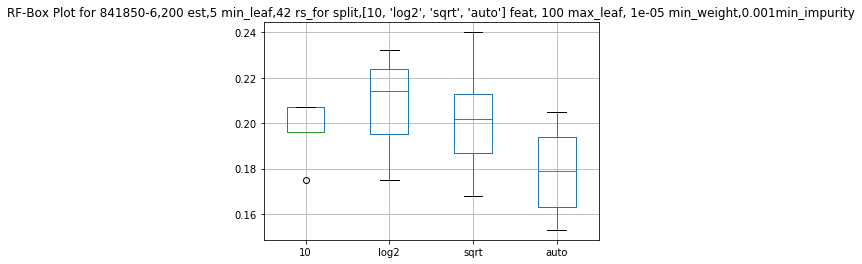

In [136]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 1 For "max_features_options"
repeats=5

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

# Defaults for variables for the first experiment
feat=10
min_leaf=5
max_leaf=100
min_weight=0.00001
min_impurity=0.001
est=200

# Get the range for variables
max_features_options=[10,"log2","sqrt","auto"]
min_sample_leaf_options = [1,2,5,20,30]
max_leaf_nodes_options=[2,5,10,100,200,300] 
min_impurity_decrease_options =[0.000001,0.00001,0.001,0.01]
min_weight_fraction_leaf_options=[0.00001,0.0001,0.001,0.01,0.1] 
estimator_options = [100,200,500,1000,5000,10000,20000]

rs=42

    
#Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z,random=rs)

#X_train = Scaled_Train_Test_Split[0]
#X_test = Scaled_Train_Test_Split[1]
#y_train = Scaled_Train_Test_Split[2]
#y_test = Scaled_Train_Test_Split[3]
#scaler_X = Scaled_Train_Test_Split[4]  
#scaler_y = Scaled_Train_Test_Split[5]
#scaled_value_X=Scaled_Train_Test_Split[6]
#scaled_value_y=Scaled_Train_Test_Split[7]
    
    
for feat in max_features_options:
        results_exp[str(feat)] =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(Productname,MonthSeries,  est, min_leaf,rs,max_features_options,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(Productname,MonthSeries,est,min_leaf,max_features_options,max_leaf,min_weight,min_impurity))
results.median()

randomforest rs= 84
R2_Test 0.643 R2_Train 0.67
randomforest rs= 43
R2_Test 0.649 R2_Train 0.678
randomforest rs= 64
R2_Test 0.668 R2_Train 0.675
randomforest rs= 49
R2_Test 0.66 R2_Train 0.675
randomforest rs= 1
R2_Test 0.643 R2_Train 0.673
randomforest rs= 19
R2_Test 0.662 R2_Train 0.667
randomforest rs= 46
R2_Test 0.656 R2_Train 0.67
randomforest rs= 85
R2_Test 0.659 R2_Train 0.674
randomforest rs= 91
R2_Test 0.651 R2_Train 0.669
randomforest rs= 47
R2_Test 0.646 R2_Train 0.674
randomforest rs= 50
R2_Test 0.643 R2_Train 0.653
randomforest rs= 51
R2_Test 0.661 R2_Train 0.662
randomforest rs= 100
R2_Test 0.652 R2_Train 0.653
randomforest rs= 21
R2_Test 0.675 R2_Train 0.655
randomforest rs= 36
R2_Test 0.661 R2_Train 0.654
randomforest rs= 73
R2_Test 0.484 R2_Train 0.482
randomforest rs= 77
R2_Test 0.481 R2_Train 0.481
randomforest rs= 2
R2_Test 0.484 R2_Train 0.489
randomforest rs= 48
R2_Test 0.487 R2_Train 0.484
randomforest rs= 29
R2_Test 0.478 R2_Train 0.477
randomforest rs= 22
R2_T

1     0.649
2     0.656
5     0.661
20    0.484
30    0.478
dtype: float64

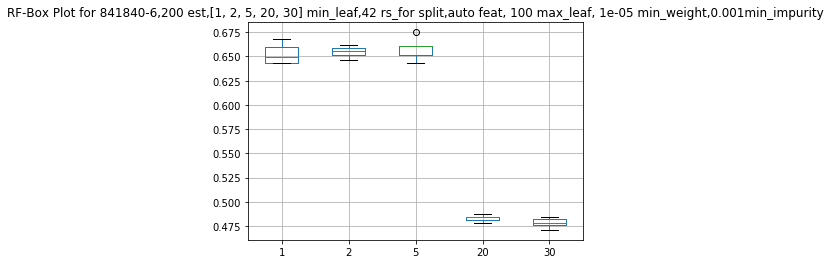

In [117]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 2 for max_features_options 

# Get the best of from previous experiment
feat='auto'

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

   
for min_leaf in min_sample_leaf_options:
            results_exp[str(min_leaf)] =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
        
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot


plt.gcf().clear()
results.boxplot()
plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(Productname,MonthSeries,  est, min_sample_leaf_options,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(Productname,MonthSeries,est,min_sample_leaf_options,feat,max_leaf,min_weight,min_impurity))


results.median()


randomforest rs= 68
R2_Test 0.479 R2_Train 0.467
randomforest rs= 41
R2_Test 0.48 R2_Train 0.47
randomforest rs= 94
R2_Test 0.478 R2_Train 0.468
randomforest rs= 54
R2_Test 0.472 R2_Train 0.468
randomforest rs= 50
R2_Test 0.473 R2_Train 0.467
randomforest rs= 20
R2_Test 0.644 R2_Train 0.641
randomforest rs= 39
R2_Test 0.654 R2_Train 0.648
randomforest rs= 68
R2_Test 0.664 R2_Train 0.637
randomforest rs= 6
R2_Test 0.646 R2_Train 0.649
randomforest rs= 1
R2_Test 0.64 R2_Train 0.642
randomforest rs= 100
R2_Test 0.652 R2_Train 0.653
randomforest rs= 47
R2_Test 0.654 R2_Train 0.66
randomforest rs= 67
R2_Test 0.658 R2_Train 0.654
randomforest rs= 40
R2_Test 0.652 R2_Train 0.665
randomforest rs= 94
R2_Test 0.659 R2_Train 0.657
randomforest rs= 87
R2_Test 0.657 R2_Train 0.647
randomforest rs= 98
R2_Test 0.659 R2_Train 0.658
randomforest rs= 17
R2_Test 0.651 R2_Train 0.66
randomforest rs= 75
R2_Test 0.655 R2_Train 0.649
randomforest rs= 63
R2_Test 0.667 R2_Train 0.656
randomforest rs= 73
R2_Tes

2      0.478
5      0.646
10     0.654
100    0.657
200    0.656
300    0.658
dtype: float64

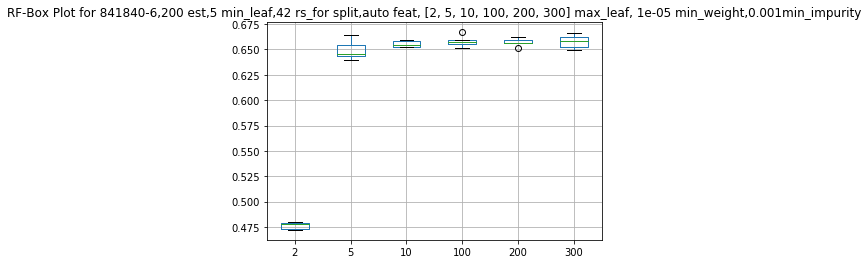

In [118]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 3 for max_leaf_nodes_options 

# Get the best of from previous experiment
min_leaf=5

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

  
for max_leaf in max_leaf_nodes_options:
                results_exp[str(max_leaf)]  =experim.experiment_RandomForest(repeats,
                X_train, X_test, y_train, y_test,scaler_y,
                rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])
            
## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(Productname,MonthSeries,  est, min_leaf,rs,feat,max_leaf_nodes_options,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weight,{}min_impurity.png'
               .format(Productname,MonthSeries,est,min_leaf,feat,max_leaf_nodes_options,min_weight,min_impurity))
results.median()

randomforest rs= 18
R2_Test 0.672 R2_Train 0.778
randomforest rs= 87
R2_Test 0.685 R2_Train 0.778
randomforest rs= 86
R2_Test 0.698 R2_Train 0.784
randomforest rs= 3
R2_Test 0.674 R2_Train 0.783
randomforest rs= 92
R2_Test 0.69 R2_Train 0.785
randomforest rs= 96
R2_Test 0.68 R2_Train 0.78
randomforest rs= 39
R2_Test 0.676 R2_Train 0.783
randomforest rs= 30
R2_Test 0.679 R2_Train 0.783
randomforest rs= 53
R2_Test 0.68 R2_Train 0.784
randomforest rs= 84
R2_Test 0.676 R2_Train 0.79
randomforest rs= 38
R2_Test 0.664 R2_Train 0.656
randomforest rs= 92
R2_Test 0.657 R2_Train 0.656
randomforest rs= 9
R2_Test 0.658 R2_Train 0.659
randomforest rs= 41
R2_Test 0.649 R2_Train 0.65
randomforest rs= 52
R2_Test 0.659 R2_Train 0.649
randomforest rs= 66
R2_Test 0.47 R2_Train 0.463
randomforest rs= 22
R2_Test 0.47 R2_Train 0.464
randomforest rs= 13
R2_Test 0.469 R2_Train 0.461
randomforest rs= 42
R2_Test 0.472 R2_Train 0.464
randomforest rs= 31
R2_Test 0.474 R2_Train 0.464
Size: 20


1e-06    0.685
1e-05    0.679
0.001    0.658
0.01     0.470
dtype: float64

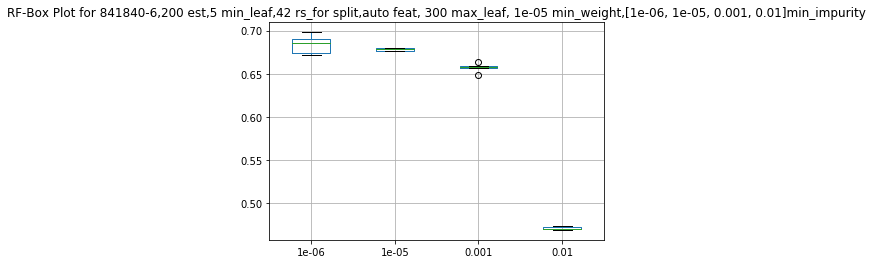

In [119]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 4 for min_impurity_decrease_options

# Get the best of from previous experiment
max_leaf=300


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for min_impurity in min_impurity_decrease_options:
                results_exp[str(min_impurity)]  =experim.experiment_RandomForest(repeats,
                X_train, X_test, y_train, y_test,scaler_y,
                rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(Productname,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity_decrease_options))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_impu.png'
               .format(Productname,MonthSeries,est,min_leaf,feat,max_leaf,min_weight,min_impurity_decrease_options))
results.median()

randomforest rs= 83
R2_Test 0.681 R2_Train 0.788
randomforest rs= 33
R2_Test 0.688 R2_Train 0.785
randomforest rs= 70
R2_Test 0.666 R2_Train 0.783
randomforest rs= 11
R2_Test 0.679 R2_Train 0.783
randomforest rs= 42
R2_Test 0.684 R2_Train 0.781
randomforest rs= 27
R2_Test 0.669 R2_Train 0.784
randomforest rs= 97
R2_Test 0.682 R2_Train 0.786
randomforest rs= 78
R2_Test 0.681 R2_Train 0.784
randomforest rs= 15
R2_Test 0.679 R2_Train 0.785
randomforest rs= 33
R2_Test 0.688 R2_Train 0.785
randomforest rs= 86
R2_Test 0.698 R2_Train 0.784
randomforest rs= 25
R2_Test 0.669 R2_Train 0.785
randomforest rs= 43
R2_Test 0.677 R2_Train 0.781
randomforest rs= 78
R2_Test 0.681 R2_Train 0.784
randomforest rs= 15
R2_Test 0.679 R2_Train 0.785
randomforest rs= 10
R2_Test 0.682 R2_Train 0.792
randomforest rs= 92
R2_Test 0.69 R2_Train 0.785
randomforest rs= 23
R2_Test 0.687 R2_Train 0.787
randomforest rs= 70
R2_Test 0.666 R2_Train 0.783
randomforest rs= 60
R2_Test 0.69 R2_Train 0.788
randomforest rs= 33
R2

1e-05     0.681
0.0001    0.681
0.001     0.679
0.01      0.687
0.1       0.656
dtype: float64

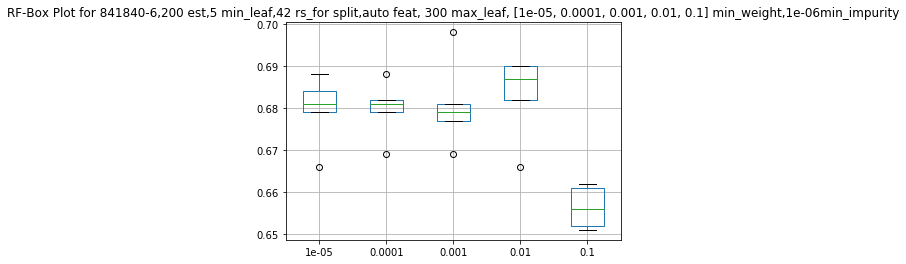

In [120]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 5 for min_weight_fraction_leaf_options

# Get the best of from previous experiment
min_impurity=1e-06

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for min_weight in min_weight_fraction_leaf_options:
                results_exp[str(min_weight)]  =experim.experiment_RandomForest(repeats,
                X_train, X_test, y_train, y_test,scaler_y,
                rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(Productname,MonthSeries,  est, min_leaf,rs,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} min_weig,{}min_impu.png'
               .format(Productname,MonthSeries,est,min_leaf,feat,max_leaf,min_weight_fraction_leaf_options,min_impurity))
results.median()

randomforest rs= 19
R2_Test 0.683 R2_Train 0.781
randomforest rs= 26
R2_Test 0.683 R2_Train 0.777
randomforest rs= 91
R2_Test 0.658 R2_Train 0.781
randomforest rs= 19
R2_Test 0.683 R2_Train 0.781
randomforest rs= 65
R2_Test 0.676 R2_Train 0.782
randomforest rs= 39
R2_Test 0.676 R2_Train 0.783
randomforest rs= 63
R2_Test 0.695 R2_Train 0.79
randomforest rs= 32
R2_Test 0.662 R2_Train 0.776
randomforest rs= 84
R2_Test 0.676 R2_Train 0.79
randomforest rs= 91
R2_Test 0.674 R2_Train 0.781
randomforest rs= 50
R2_Test 0.679 R2_Train 0.785
randomforest rs= 19
R2_Test 0.675 R2_Train 0.787
randomforest rs= 38
R2_Test 0.677 R2_Train 0.785
randomforest rs= 47
R2_Test 0.677 R2_Train 0.786
randomforest rs= 73
R2_Test 0.688 R2_Train 0.788
randomforest rs= 97
R2_Test 0.682 R2_Train 0.787
randomforest rs= 93
R2_Test 0.679 R2_Train 0.786
randomforest rs= 57
R2_Test 0.669 R2_Train 0.784
randomforest rs= 16
R2_Test 0.686 R2_Train 0.788
randomforest rs= 7
R2_Test 0.677 R2_Train 0.786
randomforest rs= 68
R2_

100      0.683
200      0.676
500      0.677
1000     0.679
5000     0.683
10000    0.681
20000    0.681
dtype: float64

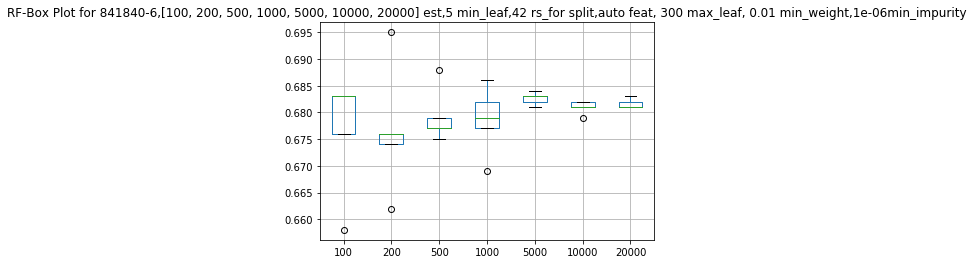

In [121]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) 6 for estimator_options

# Get the best of from previous experiment
min_weight=0.01 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for est in estimator_options:
            results_exp[str(est)] =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("RF-Box Plot for {}-{},{} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity"
          .format(Productname,MonthSeries,  estimator_options, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))
plt.savefig('RF-Box Plot for {}-{}, {} est,{} min_leaf,{} feat,{} max_leaf, {} minweig,{}minimp.png'
               .format(Productname,MonthSeries,estimator_options,min_leaf,feat,max_leaf,min_weight,min_impurity))
results.median()

In [91]:
# Get the best of from previous experiment
est=500

when=datetime.now().strftime('%m-%d %H:%M')
print("Product=",Productname)
print("Month = ",MonthSeries)
print("percent =",percent)
print("dependenttype =",dependenttype)


#Tuned Parameters after experiments
print("max_features=",feat) # EXP1
print("min_sample_leaf=", min_leaf) # EXP2
print("max_leaf_nodes=", max_leaf) # EXP3
print("min_impurity_decrease=", min_impurity) # EXP4
print("min_weight_fraction_leaf=", min_weight) # EXP5
print("est=", est) # EXP6


# store as parameters
parameters=[Product,Exp_Country,Imp_Country,MonthSeries,percent,dependenttype,rs,feat,min_leaf,max_leaf,min_impurity,min_weight,est,when]



Product= 841840
Month =  6
percent = 50
dependenttype = log
max_features= 10
min_sample_leaf= 2
max_leaf_nodes= 200
min_impurity_decrease= 1e-06
min_weight_fraction_leaf= 1e-05
est= 500


Not_Tuned
randomforest rs= 28
R2_Test 0.258 R2_Train 0.915
randomforest rs= 42
R2_Test 0.374 R2_Train 0.902
randomforest rs= 24
R2_Test 0.328 R2_Train 0.925
randomforest rs= 50
R2_Test 0.377 R2_Train 0.916
randomforest rs= 54
R2_Test 0.307 R2_Train 0.918
randomforest rs= 39
R2_Test 0.36 R2_Train 0.91
randomforest rs= 45
R2_Test 0.42 R2_Train 0.898
randomforest rs= 66
R2_Test 0.429 R2_Train 0.897
randomforest rs= 49
R2_Test 0.375 R2_Train 0.894
randomforest rs= 27
R2_Test 0.238 R2_Train 0.896
randomforest rs= 47
R2_Test 0.43 R2_Train 0.907
randomforest rs= 57
R2_Test 0.356 R2_Train 0.896
randomforest rs= 74
R2_Test 0.391 R2_Train 0.873
randomforest rs= 51
R2_Test 0.29 R2_Train 0.884
randomforest rs= 11
R2_Test 0.426 R2_Train 0.923
randomforest rs= 23
R2_Test 0.35 R2_Train 0.93
randomforest rs= 97
R2_Test 0.361 R2_Train 0.886
randomforest rs= 95
R2_Test 0.412 R2_Train 0.906
randomforest rs= 73
R2_Test 0.331 R2_Train 0.915
randomforest rs= 98
R2_Test 0.188 R2_Train 0.9
Tuned
randomforest 

Not_Tuned    0.3605
Tuned        0.4200
dtype: float64

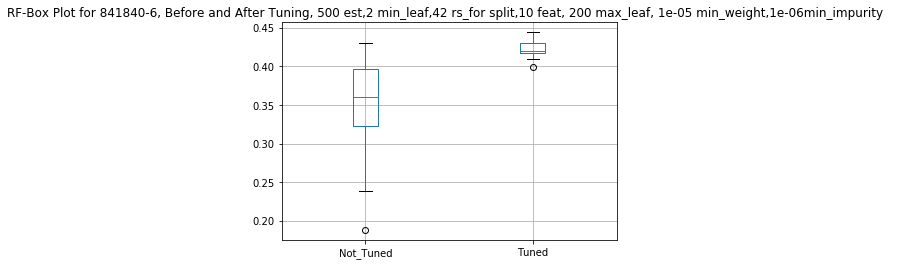

In [92]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with fixed split set) for Before Tuning and After Tuning 

tune_options=[ 'Not_Tuned','Tuned']

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()
repeats=20

for tune in tune_options:
    
            if tune=='Tuned':
                print(tune)
                
                results_exp[str(tune)] =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
    
            elif tune=='Not_Tuned':
                print(tune)
                
            # Defaults for variables for the first experiment

                results_exp[str(tune)] =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)[1] 
    
    
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{}, Before and After Tuning, {} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity  "
          .format(Productname,MonthSeries, est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))

plt.savefig("RF-BoxPlotfor {}-{}, Before and After Tuning with fixed splits.png "
          .format(Productname,MonthSeries), format='png', dpi=300)

tuned_results_fixed_split=[results['Tuned'].describe()[5],results['Tuned'].describe()[6]]
results.median()

split rs= 19
randomforest rs= 5
R2_Test 0.367 R2_Train 0.914
randomforest rs= 55
R2_Test 0.372 R2_Train 0.9
randomforest rs= 95
R2_Test 0.412 R2_Train 0.906
randomforest rs= 48
R2_Test 0.303 R2_Train 0.897
randomforest rs= 81
R2_Test 0.557 R2_Train 0.916
randomforest rs= 12
R2_Test 0.336 R2_Train 0.912
randomforest rs= 16
R2_Test 0.392 R2_Train 0.891
randomforest rs= 43
R2_Test 0.362 R2_Train 0.905
randomforest rs= 33
R2_Test 0.422 R2_Train 0.905
randomforest rs= 37
R2_Test 0.323 R2_Train 0.925
randomforest rs= 27
R2_Test 0.238 R2_Train 0.896
randomforest rs= 76
R2_Test 0.429 R2_Train 0.894
randomforest rs= 93
R2_Test 0.43 R2_Train 0.899
randomforest rs= 30
R2_Test 0.198 R2_Train 0.907
randomforest rs= 51
R2_Test 0.29 R2_Train 0.884
randomforest rs= 46
R2_Test 0.357 R2_Train 0.882
randomforest rs= 67
R2_Test 0.392 R2_Train 0.886
randomforest rs= 50
R2_Test 0.377 R2_Train 0.916
randomforest rs= 70
R2_Test 0.354 R2_Train 0.931
randomforest rs= 81
R2_Test 0.557 R2_Train 0.916
randomforest

Not_Tuned    0.385
Tuned        0.419
dtype: float64

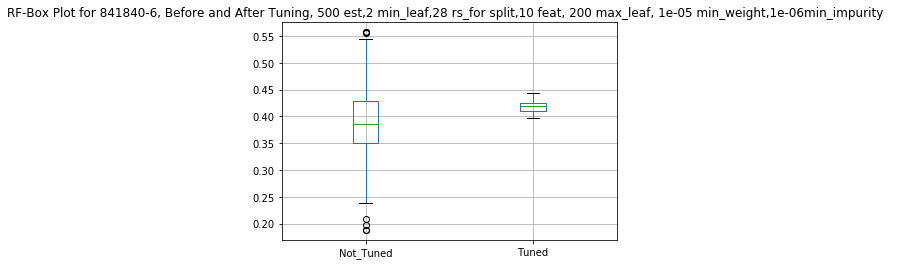

In [93]:
# MAIN for Random Forest Experiments
# EXPERIMENT (with different split sets) for Before Tuning and After Tuning 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


repeats=20
random_range_for_split=5

for r in range (random_range_for_split):

    rs=random.randint(1,100)

    print('split rs=',rs)
    
    Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z,random=rs)

    X_train = Scaled_Train_Test_Split[0]
    X_test = Scaled_Train_Test_Split[1]
    y_train = Scaled_Train_Test_Split[2]
    y_test = Scaled_Train_Test_Split[3]
    scaler_X = Scaled_Train_Test_Split[4]  
    scaler_y = Scaled_Train_Test_Split[5]
    scaled_value_X=Scaled_Train_Test_Split[6]
    scaled_value_y=Scaled_Train_Test_Split[7]
     
    
    for tune in tune_options:
    
            if tune=='Not_Tuned':
                
                results_exp[str(tune)]  =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)[1] 

                            
            elif tune=='Tuned':
                
                results_exp[str(tune)] =experim.experiment_RandomForest(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  est=est,min_leaf=min_leaf,feat=feat,max_leaf=max_leaf,min_weight=min_weight,min_impurity=min_impurity)[1] 
                
    results=pd.concat([results,results_exp])
    
## summarize results
print('Size:',results.size)
#print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("RF-Box Plot for {}-{}, Before and After Tuning, {} est,{} min_leaf,{} rs_for split,{} feat, {} max_leaf, {} min_weight,{}min_impurity  "
          .format(Productname,MonthSeries, est, min_leaf,rs,feat,max_leaf,min_weight,min_impurity))

plt.savefig("RF-Box Plot for {}-{}, Before and After Tuning with different splits.png "
          .format(Productname,MonthSeries), format='png', dpi=300)

tuned_results_mixed_split=[results['Tuned'].describe()[5],results['Tuned'].describe()[6]]
results.median()

In [94]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction')
# Read from Excel Tuning paremeters
Tuned_set = pd.ExcelFile('Tuned_Parameters.xlsx'.format(Exp_Country,Imp_Country,Product))
Tuned_set_RF_all = Tuned_set.parse('RF', header=0,index_col=None, na_values=['NA'])
Tuned_set_NN_all = Tuned_set.parse('NN', header=0,index_col=None, na_values=['NA'])


# For this experiment 
tuned_results_RF=tuned_results_fixed_split+tuned_results_mixed_split

Tuned_set_RF =  DataFrame(columns='Product Exp Imp Month dependenttype perc rs_split max_features min_sample_leaf max_leaf_nodes min_impurity min_weight est Datetime fix_p50 fix_p75 mix_p50 mix_p75'.split())
Tuned_set_RF.loc[0]= parameters + tuned_results_RF

# Combine with the other experiments 
Tuned_set_RF_all= pd.concat([Tuned_set_RF_all,Tuned_set_RF])


In [95]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction')
# Write to Excel this and previous Tuning paremeters
writer = pd.ExcelWriter('Tuned_Parameters.xlsx')
Tuned_set_RF_all.to_excel(writer,'RF')
Tuned_set_NN_all.to_excel(writer,'NN')
writer.save()

# END OF RANDOM FOREST EXPERIMENTS

# START OF NN EXPERIMENTS

In [ ]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Box_Plots_For_NeuralNetworks/{}'.format(Exp_Country))

In [ ]:
experim.NeuralNetwork(X_train, X_test, y_train, y_test,scaler_y,rand=41,dependenttype=dependenttype)          

In [ ]:
experim.experiment_NN(3,X_train, X_test, y_train, y_test,scaler_y,is_random_fixed='FALSE',dependenttype=dependenttype)    

In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 1 For "solver_options"

repeats=5

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

# Defaults for variables for the first experiment
slv='adam'
activ ='identity'
alph=0.0001 
max_iteration=200  
hidden_layer=(30,30)

# Get the range for variables
solver_options = ['lbfgs', 'adam','sgd' ]
activation_options = ['identity', 'logistic', 'tanh', 'relu']
alpha_options = [0.001,0.00001,0.0000001]
max_iteration_options = [1000,10000,50000,100000]
hidden_layer_sizes_options=[(10,10),(30,30),(100,100),(30,30,30),(30,100,30)]

rs=42

    
Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z,random=rs)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]
    
    
for slv in solver_options:
        results_exp[str(slv)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries, solver_options, activ, alph, max_iteration, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(Productname,MonthSeries,solver_options, activ,alph, max_iteration,hidden_layer), format='png', dpi=300)
results.median()

In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 2 for activation__options 

slv='lbfgs'
# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for activ in activation_options:
        results_exp[str(activ)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries, slv, activation_options, alph, max_iteration, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(Productname,MonthSeries, slv, activation_options, alph, max_iteration, hidden_layer), format='png', dpi=300)
results.median()

In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 3 for alpha_options 

activ ='identity'
# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

 
for alph in alpha_options:
        results_exp[str(alph)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries, slv, activ, alpha_options, max_iteration, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(Productname,MonthSeries, slv, activ, alpha_options, max_iteration, hidden_layer), format='png', dpi=300)
results.median()

In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 4 for hidden_layer_sizes_options

alph=1e-05

# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for hidden_layer in hidden_layer_sizes_options:
        results_exp[str(hidden_layer)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries, slv, activ, alph, max_iteration, hidden_layer_sizes_options))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(Productname,MonthSeries, slv, activ, alph, max_iteration, hidden_layer_sizes_options), format='png', dpi=300)
results.median()

In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) 5 for max_iteration_options

hidden_layer=(100,100)

# Get the best of from previous experiment

# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

for max_iteration in max_iteration_options:
        results_exp[str(max_iteration)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries, slv, activ, alph, max_iteration_options, hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, {}solver, {}activ, {}alpha, {}max_ite, {}layer.png "
          .format(Productname,MonthSeries, slv, activ, alph, max_iteration_options, hidden_layer), format='png', dpi=300)
results.median()

In [ ]:
max_iteration=100000
# Get the best of from previous experiment

when=datetime.now().strftime('%m-%d %H:%M')

print("Product=",Productname)
print("Month = ",MonthSeries)
print("rs for split",rs)


print("percent",percent)
print("dependenttype",dependenttype)

#Tuned Parameters after experiments
print("solver=",slv) # EXP1
print("activity=", activ) # EXP2
print("alpha=", alph) # EXP3
print("hidden_layer=", hidden_layer) # EXP4
print("max_iteration=", max_iteration) # EXP5

# store as parameters
parameters=[Product,Exp_Country,Imp_Country,MonthSeries,percent,dependenttype, rs,slv,activ,alph,hidden_layer,max_iteration,when]


In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with fixed split set) for Before Tuning and After Tuning 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()

tune_options=[ 'Not_Tuned','Tuned']

for tune in tune_options:

        if tune=='Tuned':
            print(tune)
            

            results_exp[str(tune)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
    
        elif tune=='Not_Tuned':
            print(tune)
                
            # Defaults for variables for the first experiment
            results_exp[str(tune)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)[1] 
    
    
results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()


plt.title("NN-Box Plot for {}-{}, Before and After Tuning, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries, slv, activ, alph, max_iteration,hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, Before and After Tuning with fixed splits.png "
          .format(Productname,MonthSeries), format='png', dpi=300)

tuned_results_fixed_split=[results['Tuned'].describe()[5],results['Tuned'].describe()[6]]
results.median()

In [ ]:
# MAIN for Neural Network Experiments
# EXPERIMENT (with different split sets) for Before Tuning and After Tuning 


# Initialize results
results = DataFrame()
results_exp = DataFrame()
results_split= DataFrame()


repeats=5
random_range_for_split=5

for r in range (random_range_for_split):

    rs=random.randint(1,100)

    print('split rs=',rs)
    
    Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z,random=rs)

    X_train = Scaled_Train_Test_Split[0]
    X_test = Scaled_Train_Test_Split[1]
    y_train = Scaled_Train_Test_Split[2]
    y_test = Scaled_Train_Test_Split[3]
    scaler_X = Scaled_Train_Test_Split[4]  
    scaler_y = Scaled_Train_Test_Split[5]
    scaled_value_X=Scaled_Train_Test_Split[6]
    scaled_value_y=Scaled_Train_Test_Split[7]
     
    
    for tune in tune_options:
    
            if tune=='Not_Tuned':
                
                results_exp[str(tune)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype)[1] 
                        
            elif tune=='Tuned':
                
                results_exp[str(tune)] =experim.experiment_NN(repeats,
                  X_train, X_test, y_train, y_test,scaler_y,
                  rand=20,is_random_fixed='FALSE',dependenttype=dependenttype,
                  activ=activ,alph=alph,max_iteration=max_iteration, slv=slv, hidden_layer=hidden_layer)[1] 
              
    results=pd.concat([results,results_exp])
    
## summarize results
print('Size:',results.size)
#print(results.describe())

#save boxplot
plt.gcf().clear()
results.boxplot()

plt.title("NN-Box Plot for {}-{}, Before and After Tuning, {}solver, {}activ, {}alpha, {}max_ite, {}hiddenlayer "
          .format(Productname,MonthSeries,slv, activ, alph, max_iteration,hidden_layer))

plt.savefig("NN-Box Plot for {}-{}, Before and After Tuning with different splits.png "
          .format(Productname,MonthSeries), format='png', dpi=300)

tuned_results_mixed_split=[results['Tuned'].describe()[5],results['Tuned'].describe()[6]]
results.median()

In [ ]:
# Read from Excel Tuning paremeters
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction')
Tuned_set = pd.ExcelFile('Tuned_Parameters.xlsx'.format(Exp_Country,Imp_Country,Product))
Tuned_set_RF_all = Tuned_set.parse('RF', header=0,index_col=None, na_values=['NA'])
Tuned_set_NN_all = Tuned_set.parse('NN', header=0,index_col=None, na_values=['NA'])

# For this experiment 
tuned_results_NN=tuned_results_fixed_split+tuned_results_mixed_split

Tuned_set_NN =  DataFrame(columns='Product Exp Imp Month dependenttype perc rs_split Solver Activity Alpha Hidden_layer Max_iteration Datetime fix_p50 fix_p75 mix_p50 mix_p75'.split())
Tuned_set_NN.loc[0]= parameters + tuned_results_NN

# Combine with the other experiment 
Tuned_set_NN_all= pd.concat([Tuned_set_NN_all,Tuned_set_NN])




# END OF NN EXPERIMENTS

In [ ]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction')
# Write to Excel this and previous Tuning paremeters
writer = pd.ExcelWriter('Tuned_Parameters.xlsx')
Tuned_set_RF_all.to_excel(writer,'RF')
Tuned_set_NN_all.to_excel(writer,'NN')
writer.save()



# Start Conclusion Of Experiments

# LSTM EXPERIMENT (with fixed split set) SECTION

In [ ]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Plots_for_LSTM')

In [ ]:
results = DataFrame()

repeats = 1
e=500
n=100
lr=0.001
b=50
deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)
deney[1] 

In [ ]:
#rs=29
rs=42
repeats = 1
drop_rate=0.0
do_batch='TRUE'
do_model='B'
random_split='TRUE'

e=5
n=300
lr=0.01
b=1

# Set X train, X test, y train, y test
rs=42
Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X,dependent_variable,Z,random=rs)

X_train = Scaled_Train_Test_Split[0].values
X_test = Scaled_Train_Test_Split[1].values
y_train = Scaled_Train_Test_Split[2].values
y_test = Scaled_Train_Test_Split[3].values
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,X_train, X_test, y_train, y_test,scaler_X,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

In [ ]:
results = DataFrame()
repeats = 10
e=100
n=50
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for b in batch_sizes:
            results_exp[str(b)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]

        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size "
          .format(Productname,MonthSeries,e,n,lr,batch_sizes))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{}lr,{}bsize.png'
               .format(Productname,MonthSeries,e,n,lr,batch_sizes))

In [ ]:
#rs=29
rs=42
repeats = 1
SplitData=TrainTestSplit(rs,X,y,date,th,random_split)

e=200
n=400
lr=0.001
b=30

train_X=SplitData[0] 
test_X=SplitData[1] 
train_y=SplitData[2] 
test_y=SplitData[3]
scaler_x=SplitData[4]
scaler_y=SplitData[5]

deney=experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)

error_rmse=deney[0] 
error_r2=deney[1] 
error_r2hat=deney[2] 
train_y=deney[3]
history=deney[4]
print(error_r2)
print(error_r2hat)

In [ ]:

#repeats=5
e=2000
n=100
lr=0.05
b=50

neurons = [5, 50, 100]
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]

        for n in neurons:
            results_exp[str(n)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()
results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate {}batch size"
          .format(Productname,MonthSeries,e,neurons,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons{},lr{}, b.png'
               .format(Productname,MonthSeries,e,neurons,lr,b))


In [ ]:
# LSTM EXPERIMENT

#def experiment(repeats,n_epochs,n_neurons,learning_rate,bs,rs,X,y,date):
def experiment_LSTM(repeats,n_epochs,n_neurons,learning_rate,bs,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y):
    K.clear_session()

#    print(type(train_X))
    train_X =train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

#    train_X =train_X.reshape((train_X.shape[0], train_X.shape[1],1))
#    test_X = test_X.reshape((test_X.shape[0], test_X.shape[1],1))
#    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
    
    error_rmse = list()
    error_r2hat = list()
    error_r2 = list()
    for r in range(repeats):
        
        print('Shape of X Train',train_X.shape[1],train_X.shape[2])
    

        if do_model=='A':
            model = Sequential() 
            model.add(LSTM(n_neurons,input_shape=(train_X.shape[1], train_X.shape[2])))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(n_neurons))
            model.add(Dropout(drop_rate))
            
            model.add(Dense(1))
#            model.add(Activation('sigmoid'))
            model.add(Activation('linear'))
        
        elif do_model=='B':   
            input_layer=Input(shape=(train_X.shape[1], train_X.shape[2]),dtype='float32')
            lstm_layer1=LSTM(n_neurons,input_shape=(train_X.shape[1],train_X.shape[2]),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=True)(input_layer)
            lstm_layer2=LSTM(n_neurons,input_shape=(train_X.shape[1],n_neurons),
                         dropout=drop_rate, 
                         recurrent_dropout=drop_rate,
                         return_sequences=False)(lstm_layer1)
            dropout_layer=Dropout(drop_rate)(lstm_layer2)

            output_layer=Dense(1,activation="linear")(dropout_layer)
#            output_layer=Dense(1,activation="linear")(lstm_layer2)
         

        #ix layerlarda Activation için RELU Output için linear uygun oluyor. Kaynak Siraj Raval
        
            model=Model(inputs=input_layer, outputs=output_layer)
        
        
        #decay_rate = learning_rate / n_epochs
        
        decay_rate = 0.8
        momentum = 0.9
         
        sgd = optimizers.SGD(lr=learning_rate, clipvalue=0.3,momentum=momentum, decay=decay_rate,nesterov=True)
        adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

        #model.compile(loss='mean_squared_error', optimizer='adam')
        
        
#        model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
        model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons)))
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons)))

        model.summary()
        
        save_weights_at=os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons))

        save_best=ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                                 save_best_only=True, save_weights_only=False, mode='min',
                                 period=1)
        
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
        early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
        
        history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=bs, 

                            validation_data=(test_X, test_y), verbose=1, 
#                            callbacks=[reduce_lr],
                           # callbacks=[save_best],

                           # callbacks=[early_stop],
                            shuffle=False)

#        best_model=load_model(os.path.join('Data','train_dataset.hdf5')
#        model=load_model(os.path.join('Data','train_dataset{}-{}neurons.hdf5'.format(Productname,n_neurons)))

        #model=best_model

        
        

        
        # summarize history for loss
        plt.gcf().clear()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        
        # summarize history for accuracy
#        plt.plot(history.history['acc'])
#        plt.plot(history.history['val_acc'])
#        plt.title('model accuracy')
#        plt.ylabel('accuracy')
#        plt.xlabel('epoch')
#        plt.legend(['train', 'test'], loc='upper left')
#        plt.show()


#        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[1]))

        test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
        inv_x_test = scaler_x.inverse_transform(test_X_reshaped)
        inv_x_test = pd.DataFrame(data=inv_x_test[:,:])

        # make a prediction
        y_predict_test = model.predict(test_X)
        y_predict_train = model.predict(train_X)

        # invert scaling for forecast
        inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
        inv_y_predict_test = inv_y_predict_test[:,0]
        inv_y_predict_train = scaler_y.inverse_transform(y_predict_train)
        inv_y_predict_train = inv_y_predict_train[:,0]

        # invert scaling for actual
        y_test = test_y.reshape((len(test_y), 1))
        inv_y_test = scaler_y.inverse_transform(test_y)
        inv_y_test = inv_y_test[:,0]

        y_train = train_y.reshape((len(train_y), 1))
        inv_y_train = scaler_y.inverse_transform(train_y)
        inv_y_train = inv_y_train[:,0]

        # calculate RMSE for DIFFERENCE
        rmse_test = sqrt(mean_squared_error(inv_y_test, inv_y_predict_test))
        print('Test RMSE: %.3f' % rmse_test)
        R2_test=int(1000*(metrics.r2_score(inv_y_test, inv_y_predict_test)))/1000
        print('R2_test: %.3f' % R2_test)

        rmse_train = sqrt(mean_squared_error(inv_y_train, inv_y_predict_train))
        print('Train RMSE: %.3f' % rmse_train)
        R2_train=int(1000*(metrics.r2_score(inv_y_train, inv_y_predict_train)))/1000
        print('R2_train: %.3f' % R2_train)

        # calculate RMSE for REAL VALUE

        real_y_test= inv_x_test.iloc[:,0]+inv_y_test
        real_y_predict_test=inv_x_test.iloc[:,0]+inv_y_predict_test
        
        real_rmse_test = sqrt(mean_squared_error(real_y_test, real_y_predict_test))
        print('Test RMSE: %.3f' % real_rmse_test)
        real_R2_test=int(1000*(metrics.r2_score(real_y_test, real_y_predict_test)))/1000
        print('R2_test: %.3f' % real_R2_test)
        
        error_rmse.append(real_rmse_test)
        error_r2hat.append(real_R2_test)
        error_r2.append(R2_test)
        
        
        plt.gcf().clear()
        plt.figure(figsize=(5.5, 5.5))
        plt.plot(range(len(inv_y_test)), inv_y_test, linestyle='-', marker='*', color='r')
        plt.plot(range(len(inv_y_predict_test)), inv_y_predict_test, linestyle='-', marker='.', color='b')
        plt.legend(['Actual','Predicted'], loc=2)
        plt.title('Actual vs Predicted for {}'.format(Productname))
        plt.ylabel('Trade Value')
        plt.xlabel('Index')
        plt.savefig('LSTM-LinePlt{} ,{} epochs,{} neurons,{} learning_rate,{} batch size, {} random, {} R2.png'.format(Productname,
                                n_epochs,n_neurons,learning_rate,bs,rs,R2_test), format='png', dpi=300)
       

        
        
    return error_rmse,error_r2,error_r2hat,train_y,history

In [ ]:
results = DataFrame()

repeats = 1

# vary training epochs"
epochs = [50, 500, 1000,2000]
neurons = [5, 50,100]
learning_rates= [0.001, 0.01, 0.05, 0.1]
batch_sizes=[5, 12, 24,50,100]


e=3000
n=200
lr=0.02
b=50


e=500
n=100
lr=0.05
b=50
results_exp = DataFrame()
results = DataFrame()
for r in range (0,50):
        rs=random.randint(1,100)
        SplitData=TrainTestSplit(rs,X,y,date,th,random_split)
#        print(rs)
        train_X=SplitData[0] 
        test_X=SplitData[1] 
        train_y=SplitData[2] 
        test_y=SplitData[3]
        scaler_x=SplitData[4]
        scaler_y=SplitData[5]
        split_succesfull=SplitData[7]



        for e in epochs:
            results_exp[str(e)] = experiment_LSTM(repeats,e,n,lr,b,drop_rate,do_batch,do_model,train_X, test_X, train_y, test_y,scaler_x,scaler_y)[1]
        results=pd.concat([results,results_exp])

## summarize results
print('Size:',results.size)
#print(results.describe())
#save boxplot
plt.gcf().clear()

results.boxplot()
plt.title("LSTM-Box Plot for {}-{}, {} epochs,{} neurons,{} learning_rate, {}batch size "
          .format(Productname,MonthSeries,epochs,n,lr,b))
plt.savefig('Data/LSTM-Box Plot for {}-{}, {} epochs,{} neurons {}lr,{}b.png'
               .format(Productname,MonthSeries,epochs,n,lr,b))


